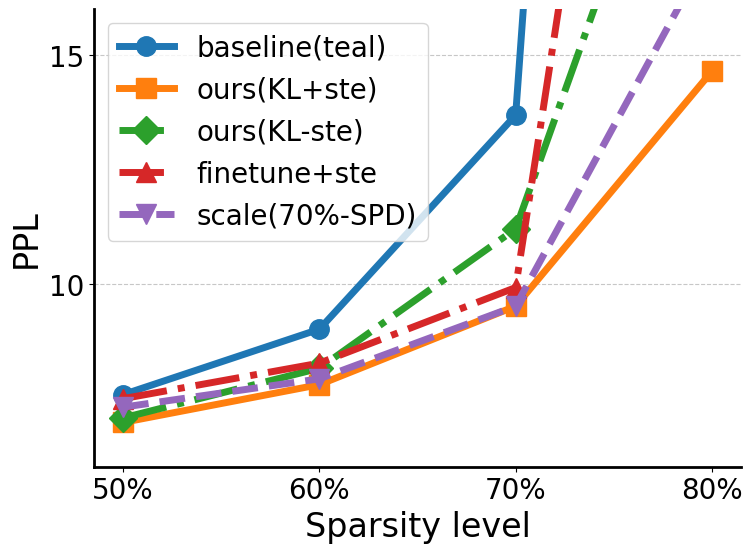

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

# 稀疏度（百分比）
sparsity_levels = [50, 60, 70, 80]

# Meta-Llama-3-8B 的 PPL 数据
ppl_data_meta3 = {
    'baseline(teal)':               [7.5762, 9.0042, 13.6816, 73.14],
    'ours(KL+ste)':    [6.9677, 7.7935, 9.5079, 14.6401],
    'ours(KL-ste)':[7.066,8.1517,11.1969,23.2097],
    'finetune+ste':             [7.4872, 8.2635, 9.9149, 37.7404],
    # 'lora+ste':            [7.0095, 7.8354, 9.6168, 15.5105],
    # 'scale(80%-SPD)':   [8.6529, 9.1757, 10.3657, 14.6401],
    'scale(70%-SPD)':   [7.3012, 7.9203, 9.5079, 17.3733],
}

# 定义样式
colors     = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]
linestyles = ['-', '-', '-.', '-.', '--', '-', '-.']
markers    = ['o', 's', 'D', '^', 'v', '<', '>']

# 全局参数：加粗线宽、放大字体
plt.rcParams.update({
    'font.size':       22,
    'axes.labelsize':  24,
    'axes.titlesize':  28,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'lines.linewidth': 5.0,   # 线宽从 3 提升到 5
    'axes.linewidth':  2.0,
})
plt.rcParams["pdf.fonttype"] = 42

fig, ax = plt.subplots(figsize=(8, 6))

for i, (method, values) in enumerate(ppl_data_meta3.items()):
    # 过滤出非 None 的点
    x = [sparsity_levels[j] for j, v in enumerate(values) if v is not None]
    y = [v for v in values if v is not None]
    # 画曲线
    ax.plot(
        x, y,
        label=method,
        color=colors[i],
        linestyle=linestyles[i],
        marker=markers[i],
        markersize=14  # 放大 marker 大小
    )
    # # 标出起始点（第一个稀疏度点）
    # ax.scatter(
    #     x[0], y[0],
    #     s=200,                  # 点的大小
    #     facecolors='none',
    #     edgecolors=colors[i],
    #     linewidths=2.5          # 标记圈的线宽
    # )
    # # 可选：给起始点加文字标注
    # ax.text(
    #     x[0] + 1, y[0],
    #     f"{y[0]:.2f}",
    #     fontsize=18,
    #     va='center'
    # )

# 设置标题、标签、范围
ax.set_xlabel("Sparsity level", fontsize=24)
ax.set_ylabel("PPL", fontsize=24)
ax.set_xticks(sparsity_levels)
ax.set_xticklabels([f"{s}%" for s in sparsity_levels])
ax.xaxis.set_major_locator(ticker.FixedLocator(sparsity_levels))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set_ylim(6, 16)  # 将上限缩减到 20
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend( loc='upper left')

plt.tight_layout()
current_date = datetime.now().strftime("%Y-%m-%d_%H%M%S")
plt.savefig(f'{current_date}_Meta-Llama-3-8B_PPL_marked.pdf', dpi=600, bbox_inches='tight')
plt.show()


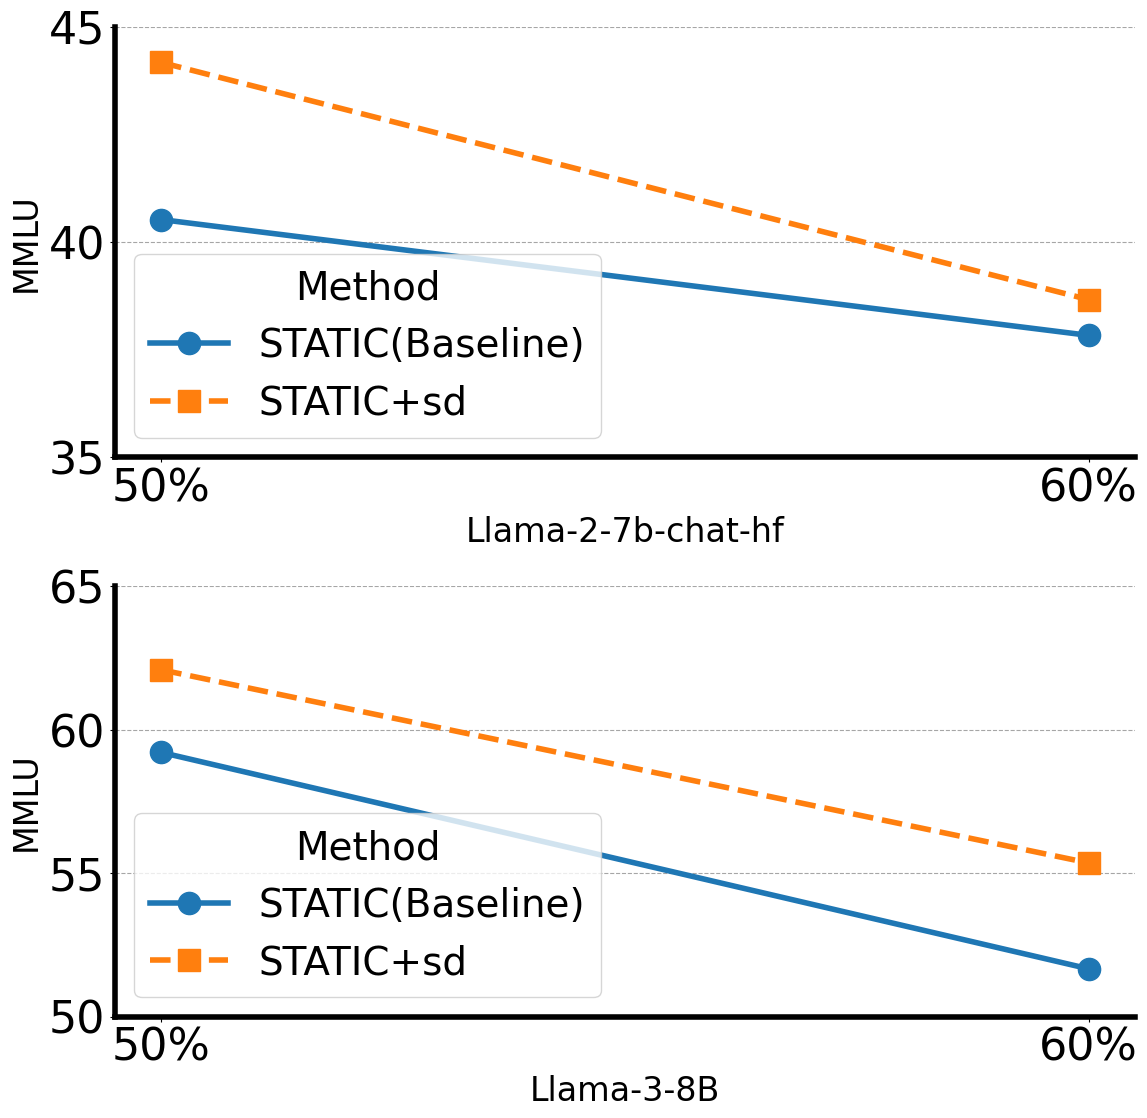

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime

# 数据定义
sparsity_levels = [50, 60]  # 稀疏度

# MMLU 数据（上半部分）
mmlu_data_llama2 = {
    'STATIC(Baseline)': [40.52, 37.83],
    'STATIC+sd': [44.17, 38.66],
}
# MMLU 数据（下半部分）
mmlu_data_llama3 = {
    'STATIC(Baseline)': [59.21,51.67,],
    'STATIC+sd': [62.09,55.36],
}
# 定义颜色、线型和 marker（顺序匹配不同方法）
colors = [
    "#1f77b4",  # 蓝色
    "#ff7f0e",  # 橙色
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf"
]
linestyles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*', 'h']

# 调整全局参数（大字号和粗线设置）
plt.rcParams.update({
    'font.size': 80,            # 全局字体大小
    'axes.labelsize': 24,       # 坐标轴标签字体大小
    'axes.titlesize': 32,       # 标题字体大小
    'legend.fontsize': 28,      # 图例字体大小
    'xtick.labelsize': 32,      # x 轴刻度字体大小
    'ytick.labelsize': 32,      # y 轴刻度字体大小
    'lines.linewidth': 4.0,     # 全局线条粗细
    'axes.linewidth': 4.0       # 坐标轴边框线粗细
})
plt.rcParams["pdf.fonttype"] = 42   # PDF 输出时嵌入矢量字体

# 创建包含两个子图的图形，采用上下排列（这里设置 figsize 可根据需要调整）
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

def plot_data(ax, mmlu_data, xlabel, ylim=(75, 95)):
    """
    在给定的轴 ax 上绘制 mmlu_data，对应的 x 轴数据是 sparsity_levels，
    并设置 x 轴、y 轴标签、刻度和网格线等。
    """
    # 绘制每种方法的曲线
    for i, (method, values) in enumerate(mmlu_data.items()):
        # 过滤 None 值
        x = [sparsity_levels[j] for j, v in enumerate(values) if v is not None]
        y = [v for v in values if v is not None]
        color = colors[i % len(colors)]
        linestyle = linestyles[i % len(linestyles)]
        marker = markers[i % len(markers)]
        ax.plot(x, y, label=method, color=color, linestyle=linestyle, marker=marker, markersize=16)

    # 设置坐标轴标签和范围
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel("MMLU", fontsize=24)
    ax.set_ylim(ylim)
    
    # 设置 x 轴刻度与标签
    ax.set_xticks([50, 60])
    ax.set_xticklabels(['50%', '60%'])
    ax.xaxis.set_major_locator(ticker.FixedLocator([50, 60]))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.tick_params(axis='both', which='major')
    
    # 添加 y 轴网格线
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.7)
    
    # 去除顶部与右侧边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加图例
    ax.legend(title="Method", title_fontsize=28, fontsize=28, loc='lower left')
    
# 绘制上面的图：Llama-2
plot_data(ax1, mmlu_data_llama2, "Llama-2-7b-chat-hf", ylim=(35, 45))

# 绘制下面的图：Llama-3
plot_data(ax2, mmlu_data_llama3, "Llama-3-8B", ylim=(50, 65))

# 调整整体布局，确保两幅图不重叠
plt.tight_layout()
plt.subplots_adjust(top=0.925, bottom=0.10, left=0.10, right=0.95, hspace=0.30)

# 保存图像，使用 bbox_inches='tight' 确保内容完整
current_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
plt.savefig(f'{current_date}-MMLU_Sparsity_scale_composite.pdf', dpi=1000, bbox_inches='tight')
plt.show()

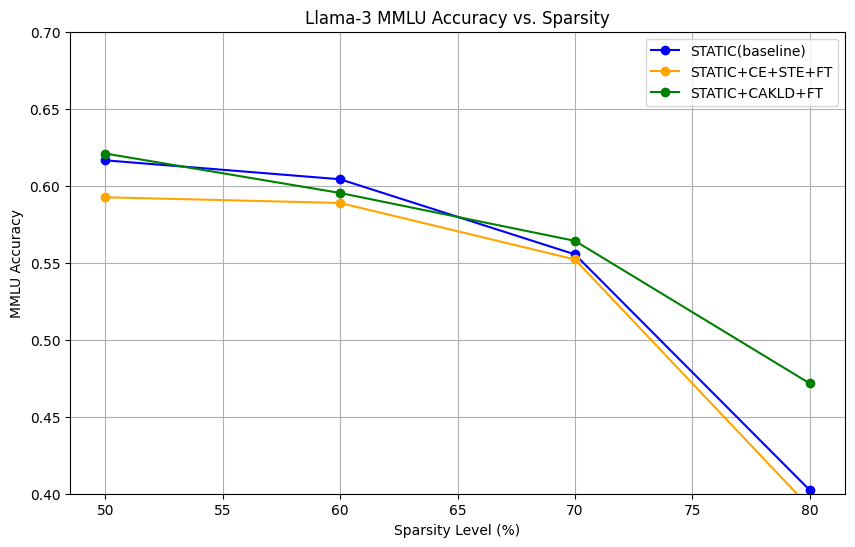

In [25]:
mmlu_data = {
    "STATIC(baseline)": [0.6165, 0.6042, 0.5554, 0.4023],
    "STATIC+CE+STE+FT": [0.5925, 0.5888, 0.5521, 0.3911],
    "STATIC+CAKLD+FT": [ 0.6209, 0.5953, 0.5642, 0.4716]
}

# 自定义颜色顺序
colors = ["blue", "orange", "green", "red", "purple"]

import matplotlib.pyplot as plt

# 稀疏度
sparsity_levels = [50, 60, 70, 80]  # 包括 0% 稀疏度

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制每种方法的折线图
for (method, values), color in zip(mmlu_data.items(), colors):
    x = [sparsity_levels[i] for i, v in enumerate(values) if v is not None]  # 包括稀疏度为 0 的点
    y = [v for v in values if v is not None]  # 包括稀疏度为 0 的值
    plt.plot(x, y, marker='o', label=method, color=color)

# 添加标题和标签
plt.xlabel("Sparsity Level (%)")
plt.ylabel("MMLU Accuracy")

# 设置y轴范围
plt.ylim(0.4, 0.7)  # 根据数据调整范围

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 设置标题
title = "Llama-3 MMLU Accuracy vs. Sparsity"
plt.title(title)

# 保存图像
plt.savefig(f"{title}.png")

# 显示图形
plt.show()